 ## Assignment 3 Experiment 1 [Using RNNs]

In [0]:
with zipfile.ZipFile("updated-json-files.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
import matplotlib.pyplot as plt
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
def plotAcc(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [0]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

## Pre-processing data

In [0]:
import os
import json
import numpy as np
from random import randrange


def load_data(link):
  
  text = []
  sentiment = []

  for filename in os.listdir(link):
    if filename != '.ipynb_checkpoints':
      file_path = os.path.join(link, filename)
      with open(file_path, encoding = 'unicode_escape') as f:
        dic = json.load(f)

        for k, v in dic['text'].items():
          text.append(v)
        for k, v in dic['sentiment'].items():
          sentiment.append(v)
  return text, sentiment

def preprocess_data(text, sentiment):
  # 80-20 split
  combo = [list(i) for i in zip(text, sentiment)]
  
  combo_test = []

  test_size = int(len(combo)*0.2)
  while len(combo_test) < test_size:
    index = randrange(len(combo))
    combo_test.append(combo.pop(index))
  
  x_train = []
  y_train = []
  x_test = []
  y_test = []
  # x, y split
  for line in combo:
    x_train.append(line[0])
    if line[1] in ['Positive', 'positive', 'postive']:
      y_train.append(2)
    elif line[1] in ['Neutral', 'neutral', 'neutra', 'neutra;', 'Neural']:
      y_train.append(1)
    elif line[1] in ['Negative', 'negative', 'Negetive']:
      y_train.append(0)
    else:
      print('error in sentiment label {}'.format(line[1]))
  for line in combo_test:
    x_test.append(line[0])
    if line[1] in ['Positive', 'positive', 'postive']:
      y_test.append(2)
    elif line[1] in ['Neutral', 'neutral', 'neutra', 'neutra;', 'Neural']:
      y_test.append(1)
    elif line[1] in ['Negative', 'negative', 'Negetive']:
      y_test.append(0)
    else:
      print('error in sentiment label {}'.format(line[1]))
      
  return (x_train, y_train), (x_test, y_test)

In [0]:
link = "updated-json-files"
text, sentiment = load_data(link)
(x_train, y_train), (x_test, y_test) = preprocess_data(text, sentiment)



In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = len(x_train)  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(sentiment)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
#y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


Found 6396 unique tokens.
Shape of data tensor: (1644, 100)
Shape of label tensor: (1644,)


In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-03-20 15:12:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-03-20 15:12:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  9.19MB/s    in 82s     

2019-03-20 15:13:48 (10.0 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [0]:
import zipfile
with zipfile.ZipFile("glove.6B.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

## Using model with 1 LSTM layer

In [0]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adadelta',
              loss='poisson',
              metrics=['acc'])

model.summary()
history1 = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=128,
                    validation_data=(x_val,y_test))



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 1,017,123
Trainable params: 1,017,123
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 1316 samples, validate on 328 samples
Epoch 1/200
1316/1316 [==============================] - 3s 2ms/step - loss: 0.6944 - acc: 0.4081 - val_loss: 0.6847 - val_acc: 0.4543
Epoch 2/200
1316/1316 [==============================] - 2s 1ms/step - loss: 0.6800 - acc: 0.4

In [0]:
y_pred = model.predict_classes(x_val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
print("The accuracy score for this model is "+str(100*accuracy_score(y_test.argmax(axis=1),y_pred))+"% accurate.")

print_cm(cm,["positive","negative","neutral"])

The accuracy score for this model is 42.3780487804878% accurate.
       t/p   positive negative  neutral 
    positive      4.0     12.0      8.0 
    negative     13.0     92.0     85.0 
     neutral     11.0     60.0     43.0 


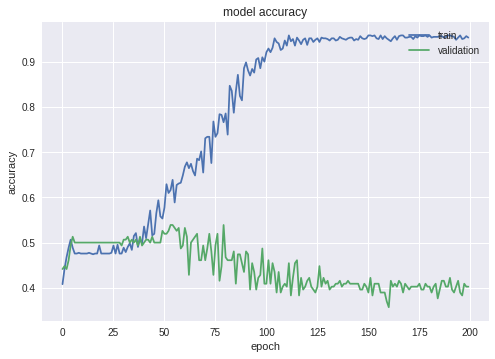

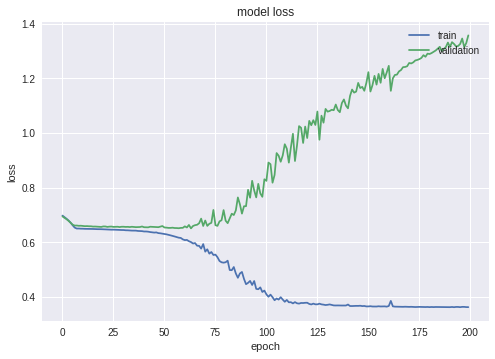

In [0]:
plotAcc(history1)
plotLosses(history1)

## Model 2 LSTM with more hidden units

In [0]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(128))



model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adadelta',
              loss='poisson',
              metrics=['acc'])

model.summary()
history2 = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val,y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 1,117,635
Trainable params: 1,117,635
Non-trainable params: 0
_________________________________________________________________
Train on 1316 samples, validate on 328 samples
Epoch 1/100
1316/1316 [==============================] - 6s 5ms/step - loss: 0.6927 - acc: 0.4582 - val_loss: 0.6799 - val_acc: 0.4695
Epoch 2/100
1316/1316 [==============================] - 5s 4ms/step - loss: 0.6715 - acc: 0.4574 - val_loss: 0.6361 - val_acc: 0.5793
Epoch 3/100
1316/1316 [==============================] - 5s 4ms/step - loss: 0.

In [0]:
y_pred = model.predict_classes(x_val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
print("The accuracy score for this model is "+str(100*accuracy_score(y_test.argmax(axis=1),y_pred))+"% accurate.")

print_cm(cm,["positive","negative","neutral"])

The accuracy score for this model is 42.3780487804878% accurate.
       t/p   positive negative  neutral 
    positive      1.0     13.0     10.0 
    negative     21.0     95.0     74.0 
     neutral      9.0     62.0     43.0 


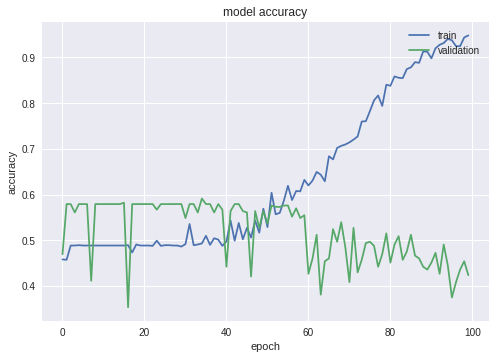

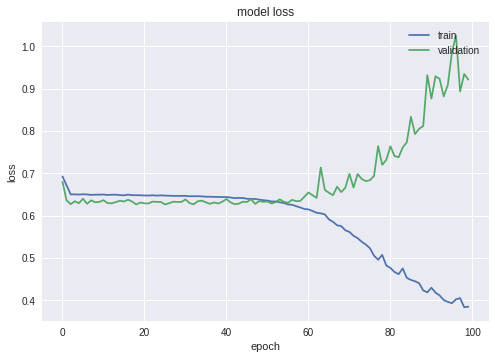

In [0]:
plotAcc(history2)
plotLosses(history2)

## Model 3 Stacked LSTM

In [0]:
from keras.layers import LSTM, AveragePooling1D, Dropout

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(128,return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(128,return_sequences = True))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adadelta',
              loss='poisson',
              metrics=['acc'])

model.summary()
history3 = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val,y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 128)          117248    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 128)          131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 38403     
Total para

In [0]:
y_pred = model.predict_classes(x_val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
print("The accuracy score for this model is "+str(100*accuracy_score(y_test.argmax(axis=1),y_pred))+"% accurate.")

print_cm(cm,["positive","negative","neutral"])

The accuracy score for this model is 37.80487804878049% accurate.
       t/p   positive negative  neutral 
    positive      2.0     13.0      9.0 
    negative     28.0     84.0     78.0 
     neutral      9.0     67.0     38.0 


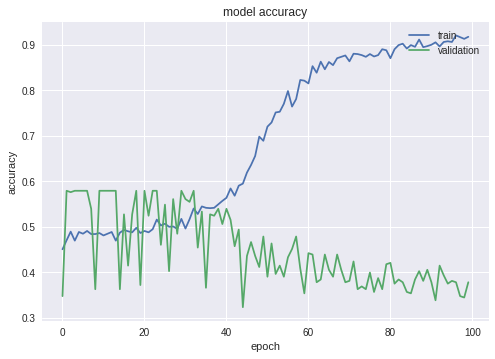

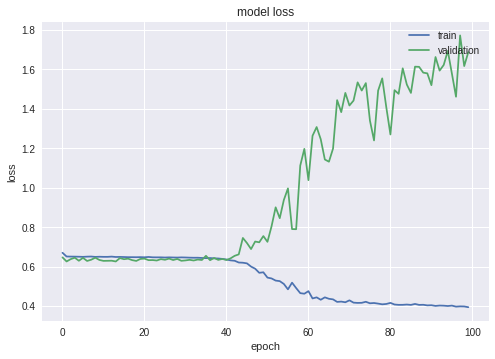

In [0]:

plotAcc(history3)
plotLosses(history3)